In [5]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()

# Ключ авторизации

Токен — это средство идентификации пользователя или отдельного сеанса работы в компьютерных сетях и приложениях.\
Различают программные и аппаратные токены.\
Мы будем использовать программный токен, который обычно представляет собой зашифрованную последовательность символов, позволяющую точно идентифицировать объект и определить уровень его привилегий. Он генерируется системой авторизации и привязывается к конкретному сеансу работы, клиенту сети или пакету данных.

https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=TOKEN \
Примечание: адресная строка в браузере будет выглядеть примерно так:  https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=.......\
Результат:

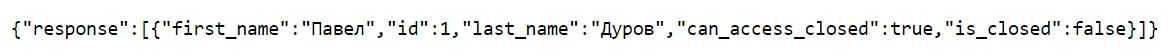

Итак, мы сделали GET-запрос к API ВКонтакте, который состоит из следующих элементов:

https://api.vk.com/method — домен и URL запроса API; обычно не меняется;
users.get — название метода, который отдаёт определённый отчёт, в нашем случае это метод для получения информации о пользователе;
user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию (в нашем примере мы запрашиваем информацию о первом пользователе), и номер версии API;
token — токен, который выдаётся только пользователям, имеющим право просматривать определённые данные, например показания счётчиков Яндекс.Метрики вашего проекта; на все остальные запросы без корректного токена система отвечает отказом.

# Запрос к API из кода

In [6]:
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}


In [7]:
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}


In [8]:
user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран
print(user['first_name'])

10.10.1984
Павел


In [9]:
ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bdate', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'},
              {'bdate': '14.2',
               'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова'},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': ''}]}


Используя API, определите долю женщин (sex=1) среди пользователей с id от 1 до 500. Иногда будут попадаться пользователи, у которых пол не указан (sex=0), — таких пользователей не нужно учитывать в общем числе.

In [14]:
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf'
url = 'https://api.vk.com/method/users.get'
ids = ",".join(map(str, range(1, 501)))
params = {'user_ids': ids, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'}
response = requests.get(url, params=params).json()['response']
for elem in response:
    if elem['sex'] == 2:
        men+=1
    elif elem['sex'] == 1:
        women+=1
    else:
        continue
print(round(women/(men+women),2))

0.49


# Сбор информации из групп

In [16]:
import requests # Импортируем модуль requests
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)
print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

{'response': {'count': 13678156, 'items': [6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550, 619, 640, 690, 702, 721, 804, 809, 832, 834, 847, 900, 905, 907, 914, 930, 943, 952, 958, 966, 976, 997, 1000, 1018, 1023, 1032, 1033, 1039, 1059, 1097, 1131, 1139, 1140, 1159, 1174, 1185, 1188, 1273, 1301, 1333, 1334, 1351, 1381, 1386, 1388, 1406, 1411, 1418, 1432, 1494, 1503, 1531, 1550, 1568, 1586, 1590, 1593, 1598, 1610, 1615, 1632, 1634, 1650, 1679, 1690, 1697, 1698, 1699, 1700, 1721, 1740, 1754, 1796, 1814, 1820, 1829, 1834, 1839, 1840, 1843, 1858, 1863, 1869, 1887, 1889, 1917, 1943, 1947, 1955, 1969, 2019, 2028, 2050, 2051, 2052, 2059, 2077, 2103, 2136, 2150, 2195, 2201, 2230, 2236, 2273, 2281, 2296, 2298, 2376, 2389, 2395, 2403, 2412, 2436, 2456, 2466, 2470, 2484, 2513, 2515, 2539, 2571, 2576, 2592, 2601, 2622, 2644, 2654, 2692, 2706, 2745, 2755, 2767, 2787, 2797, 2827, 2858, 2909, 2919, 2922, 2932, 2953, 2962, 2982, 3001, 3006, 3041, 3130, 31

In [17]:
users_for_checking = data['response']['items'][:20] # Загружаем в переменную информацию об id первых 20 пользователей в виде списка
print(users_for_checking) # Выводим перечень id первых 20 пользователей

[6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550]


In [24]:
import requests # Импортируем модуль requests
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
count = 5
offset = 0 
user_ids = [] 
max_count = 20 
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места, где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк, которое мы уже выгрузили 
    offset += count 
print(user_ids)
print(user_ids == users_for_checking) 

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550]
True


# Ограничение по частоте запросов

In [25]:
import requests # Импортируем модуль requests
import time # Импортируем модуль time
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес страницы, к которой делаем запрос
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


# Лайки, репосты и комментарии

In [27]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
token = '9f6dc4c49f6dc4c49f6dc4c4c89c4d5f4999f6d9f6dc4c4f86663a6abbebf15642ceedf' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
pprint(response.json()) 

{'response': {'count': 771,
              'items': [{'attachments': [{'type': 'video',
                                          'video': {'can_add': 0,
                                                    'can_dislike': 1,
                                                    'can_like': 1,
                                                    'can_repost': 1,
                                                    'can_subscribe': 1,
                                                    'comments': 247,
                                                    'date': 1728572600,
                                                    'description': 'Продолжаем '
                                                                   'принимать '
                                                                   'поздравления '
                                                                   'по случаю '
                                                                   'нашего '
                           

In [28]:
len(response.json()['response']['items'])

100

In [32]:
pprint(response.json()['response']['items'][0])

{'attachments': [{'type': 'video',
                  'video': {'can_add': 0,
                            'can_dislike': 1,
                            'can_like': 1,
                            'can_repost': 1,
                            'can_subscribe': 1,
                            'comments': 247,
                            'date': 1728572600,
                            'description': 'Продолжаем принимать поздравления '
                                           'по случаю нашего совершеннолетия '
                                           '🎉\n'
                                           '\n'
                                           'Спасибо всем за тёплые слова!',
                            'duration': 64,
                            'first_frame_1280': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=0&type=39&tkn=vKplsIwbCsYi8HlTDy3xpeAvB5I&fn=vid_w',
                            'first_frame_130': 'https://i.mycdn.me/getVideoPreview?id=7029659536035&idx=0&type=39&

In [33]:
stats = {} 
count_post = 0 # Счётчик «непустых» сообщений
for record in response.json()['response']['items'][:]:
    title = record['text'][:30] 
    if title: 
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date']] 
        count_post += 1 
    if count_post < 10: 
        continue 
    else: 
        break 
pprint(stats)

{'VK Музыка обновилась! Что ново': [360, 462, 86, 1728310195],
 'Какие персонажи — такие и их л': [586, 1120, 143, 1726227240],
 'Кто знает, какой сегодня день ': [300, 827, 86, 1725376800],
 'Кто разгадал ребус, тому завтр': [219, 1133, 96, 1725174600],
 'Негласное правило ВКонтакте № ': [351, 865, 145, 1726056001],
 'Новая программа монетизации от': [785, 622, 197, 1727083149],
 'Обновился VK Мессенджер в веб-': [400, 624, 253, 1726748100],
 'Представляем VK AdBlogger — но': [154, 349, 124, 1726654200],
 'Сегодня ВКонтакте исполнилось ': [291, 1141, 144, 1728560919],
 'Что можно успеть за 60 секунд?': [412, 1532, 126, 1726757657]}
